In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataframe_with_extension.csv')
df.head()

,Unnamed: 0,Data Input Year,State,Country,Language,IPEDS Race Description,Athletic Code,Team Gender,Team Name,HYR,...,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q15_EXPECTATION_EQUALITY_BY_GENDER,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,0,2022,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,J20,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
1,1,2021,CT,USA,English,African American or Black,SC,M,MEN'S SOCCER,S17,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
2,2,2023,CA,USA,English,White,MC,M,MEN'S ROWING,S20,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51
3,3,2023,NaN,Italy,Non-English,Non-Resident Alien,SC,M,MEN'S SOCCER,S19,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
4,4,2023,NaN,Germany,Non-English,Non-Resident Alien,MC,M,MEN'S ROWING,S21,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51


In [5]:
df['Team Gender'].value_counts()

W    542
M    451
Name: Team Gender, dtype: int64

In [17]:
df.columns

Index(['Unnamed: 0', 'Data Input Year', 'State', 'Country', 'Language',
       'IPEDS Race Description', 'Athletic Code', 'Team Gender', 'Team Name',
       'HYR', 'Entering Term', 'Yr', 'FCLASS', 'RetentionClass', 'ACADINDEX',
       'SATCFORAI', 'ACTUSE', 'SATCUSE', 'SATVUSE', 'satm', 'satwr', 'HSGPA',
       'FIRSTCOLLEGE', 'FIRSTMAJOR', 'First Major Name', 'LASTCOLLEGE',
       'LASTMAJOR', 'Last Major Name', 'Last Cumulative BU GPA',
       'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulativ

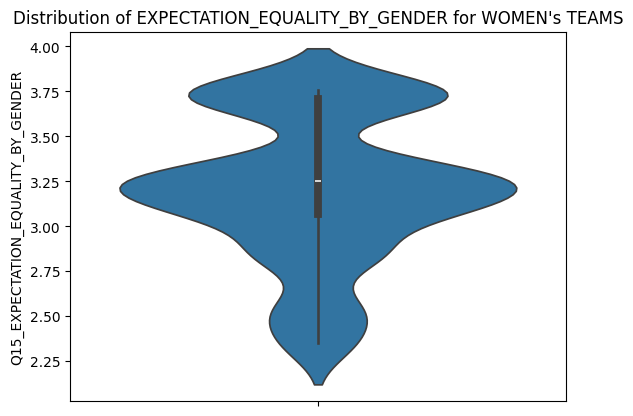

In [25]:
sns.violinplot(df[df['Team Gender'] == 'W']['Q15_EXPECTATION_EQUALITY_BY_GENDER'])
plt.title("Distribution of EXPECTATION_EQUALITY_BY_GENDER for WOMEN's TEAMS")
plt.show()

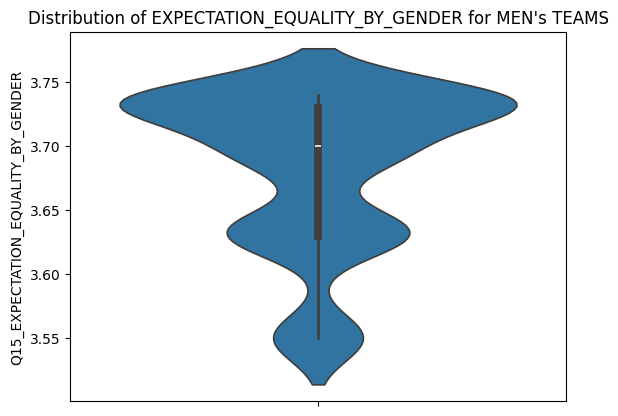

In [26]:
sns.violinplot(df[df['Team Gender'] == 'M']['Q15_EXPECTATION_EQUALITY_BY_GENDER'])
plt.title("Distribution of EXPECTATION_EQUALITY_BY_GENDER for MEN's TEAMS")
plt.show()

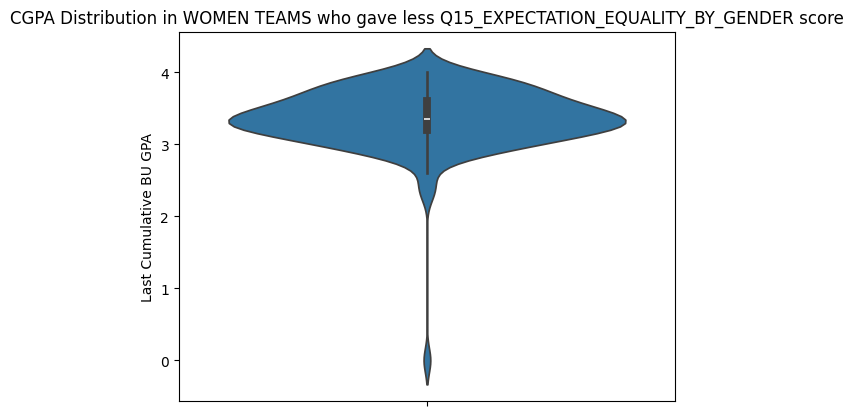

In [47]:
sns.violinplot(df[(df['Team Gender'] == 'W') & (df['Q15_EXPECTATION_EQUALITY_BY_GENDER'] <= 3)]['Last Cumulative BU GPA'])
plt.title("CGPA Distribution in WOMEN TEAMS who gave less Q15_EXPECTATION_EQUALITY_BY_GENDER score")
plt.show()

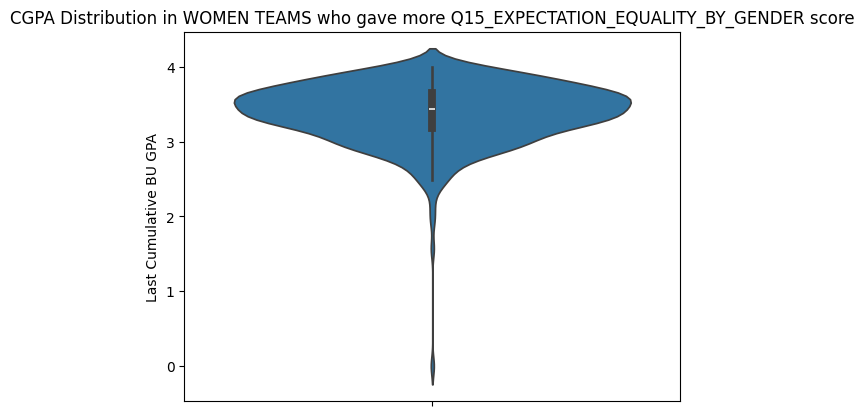

In [49]:
sns.violinplot(df[(df['Team Gender'] == 'W') & (df['Q15_EXPECTATION_EQUALITY_BY_GENDER'] > 3)]['Last Cumulative BU GPA'])
plt.title("CGPA Distribution in WOMEN TEAMS who gave more Q15_EXPECTATION_EQUALITY_BY_GENDER score")
plt.show()

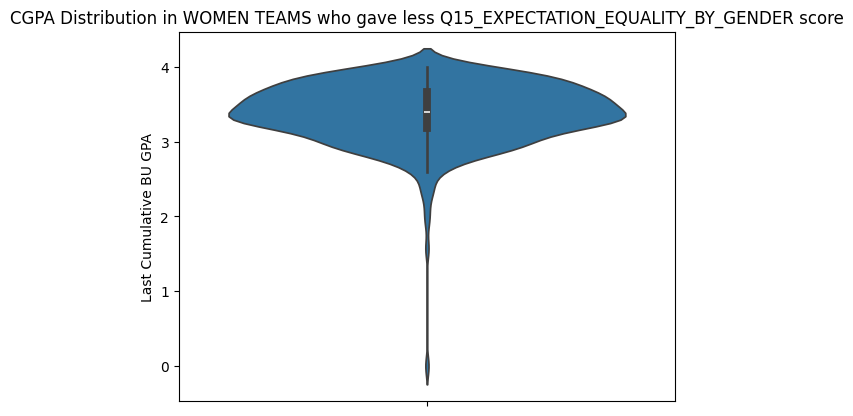

In [43]:
sns.violinplot(df[(df['Team Gender'] == 'W') & (df['Q15_EXPECTATION_EQUALITY_BY_GENDER'] <= 3.7)]['Last Cumulative BU GPA'])
plt.title("CGPA Distribution in WOMEN TEAMS who gave less Q15_EXPECTATION_EQUALITY_BY_GENDER score")
plt.show()

In [28]:
df['RetentionClass'].value_counts()

Freshmen     899
Transfers     90
Freshman       1
Name: RetentionClass, dtype: int64

In [29]:
df['RetentionClass'] = df['RetentionClass'].apply(lambda x : 'Freshmen' if x == 'Freshman' else x)

In [30]:
df['RetentionClass'].value_counts()

Freshmen     900
Transfers     90
Name: RetentionClass, dtype: int64

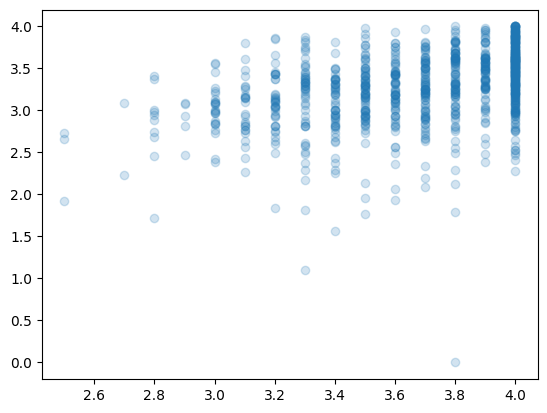

In [55]:
freshmen_df = df[df['RetentionClass'] == 'Freshmen']

plt.scatter(freshmen_df['HSGPA'], freshmen_df['Last Cumulative BU GPA'],alpha = 0.2  )

<Axes: xlabel='HSGPA', ylabel='Last Cumulative BU GPA'>

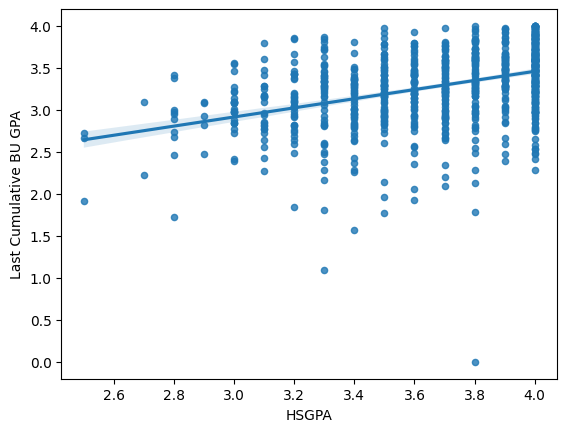

In [56]:
sns.regplot(data=freshmen_df, x='HSGPA', y='Last Cumulative BU GPA', scatter_kws={'s': 20})

<Axes: ylabel='Last Cumulative BU GPA'>

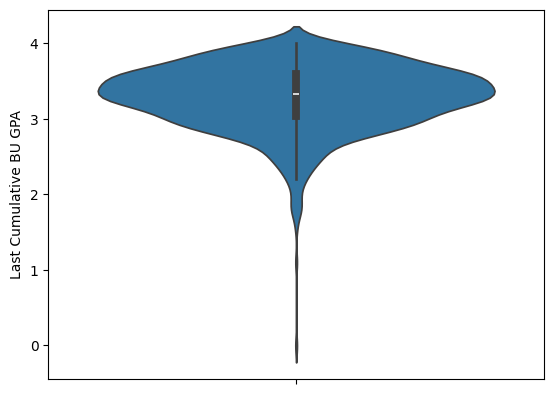

In [33]:
sns.violinplot(freshmen_df['Last Cumulative BU GPA'])

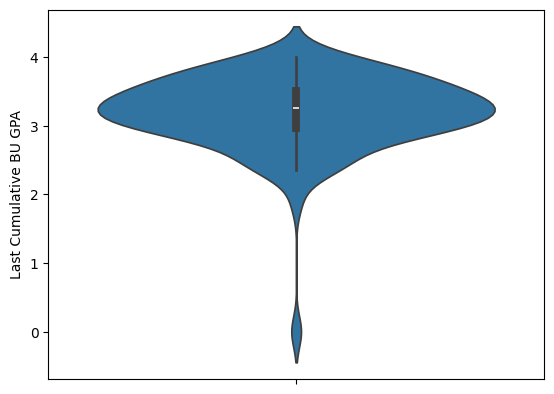

In [34]:
transfers_df = df[df['RetentionClass'] == 'Transfers']
sns.violinplot(transfers_df['Last Cumulative BU GPA'])
plt.show()

<Axes: xlabel='HSGPA', ylabel='Last Cumulative BU GPA'>

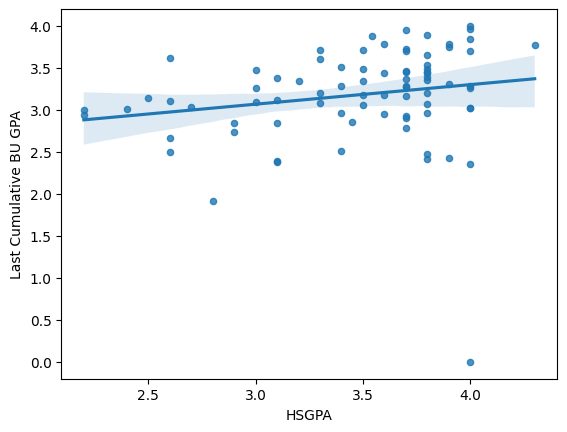

In [53]:
sns.regplot(data=transfers_df, x='HSGPA', y='Last Cumulative BU GPA', scatter_kws={'s': 20})

In [36]:
df['FCLASS'].value_counts()

FRESHMEN             897
TRANSFERS             89
Graduate Students      7
Name: FCLASS, dtype: int64

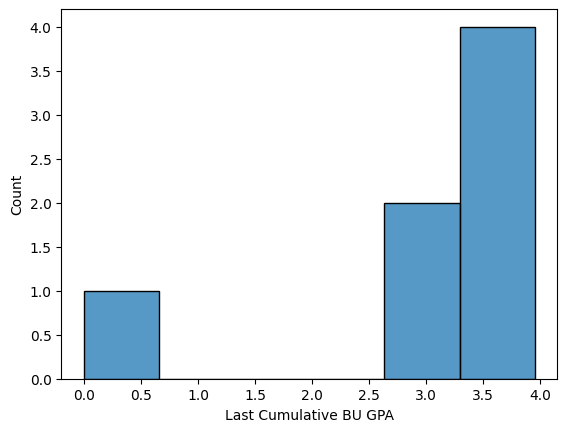

In [38]:
graduates_df = df[df['FCLASS'] == 'Graduate Students']
sns.histplot(graduates_df['Last Cumulative BU GPA'])
plt.show()

<Axes: xlabel='Last Cumulative BU GPA', ylabel='Count'>

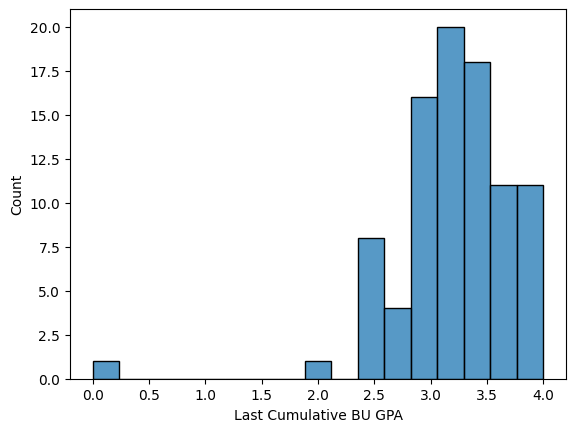

In [39]:
sns.histplot(transfers_df['Last Cumulative BU GPA'])


<Axes: xlabel='Last Cumulative BU GPA', ylabel='Count'>

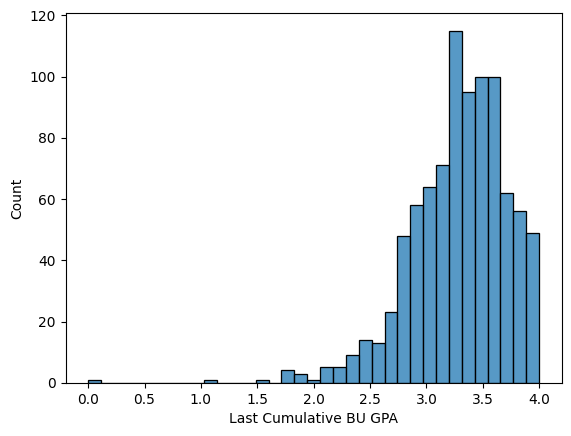

In [40]:
sns.histplot(freshmen_df['Last Cumulative BU GPA'])
